In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTTools import remove_special, is_seq
from hypernetworks.utils.HTGraph import to_graph
from hypernetworks.utils.HTInOut import from_YAML

import yaml

from IPython.display import display, Javascript, HTML, Image

In [2]:
parser = load_parser()

In [3]:
hn = from_YAML(yaml.safe_load("""
# interpret1:
#     hstype: ALPHA
#     simplex:
#         - opt2
#     psi: interpretation1

# interpret2:
#     hstype: ALPHA
#     simplex:
#         - opt2
#     psi: interpretation2

interpret3:
    hstype: 1
    simplex:
        - opt2
    psi: interpretation3

opt2:
    hstype: 1
    simplex:
        - cop-fcast
        - heat-demand-fcast
        - daily-elec-fcast
        - gas-co2-fcast
        - elec-co2-fcast
        - gas-price-fcast
        - elec-price-fcast
        - ts-level
        # - demand-mgmt-fcast
        - opt
    partOf:
        # - interpret1
        # - interpret2
        - interpret3
    psi: optimisation2

opt:
    hstype: 1
    simplex:
        - cop-fcast
        - heat-demand-fcast
        - daily-elec-fcast
        - gas-co2-fcast
        - elec-co2-fcast
        - gas-price-fcast
        - elec-price-fcast
        - ts-level
        # - demand-mgmt-fcast
    partOf:
        - opt2
    psi: optimisation

# demand-mgmt-fcast:
#     hstype: 0
#     partOf:
#         - opt
#         - opt2
#     psi: demandmgmtfcast

gas-co2-fcast:
    hstype: 0
    partOf:
        - opt
        - opt2
    psi: gasco2fcast

elec-co2-fcast:
    hstype: 0
    partOf:
        - opt
        - opt2
    psi: elecco2fcast

gas-price-fcast:
    hstype: 0
    partOf:
        - opt
        - opt2
    psi: gaspricefcast

# pv-tariff-fcast:
#     hstype: 0
#     partOf:
#         - opt
#         - opt2
#     psi: pvtarifffcast

elec-price-fcast:
    hstype: 0
    partOf:
        - opt
        - opt2
    psi: elecpricefcast

# sol-fcast:
#     hstype: 0
#     partOf:
#         - pv-fcast
#     psi: solfcast

# pv-fcast:
#     hstype: 1
#     simplex:
#         - sol-fcast
#     partOf:
#         - opt
#         - opt2
#     psi: pvfcast

grnd-temp-data:
    hstype: 1
    simplex:
        - grnd-temp-reading
    partOf:
        - grnd-temp-fcast
    psi: grndtempdata

# New
grnd-temp-reading:
    hstype: 0
    partOf:
        - grnd-temp-data
    psi: grndtempreading

grnd-temp-fcast:
    hstype: 1
    simplex:
        - grnd-temp-data
    partOf:
        - cop-fcast
    psi: grndtempfcast

cop-fcast:
    hstype: 1
    simplex:
        - grnd-temp-fcast
    partOf:
        - opt
        - opt2
    psi: copfcast

wthr-fcast:
    hstype: 0
    partOf:
        - heat-demand-fcast
        - ts-level
    psi: wthrfcast

ts-level:
    hstype: 1
    simplex:
        - ts-current-temp-data
        - wthr-fcast
    partOf:
        - opt
        - opt2
    psi: tslevel

ts-current-temp-data:
    hstype: 0
    partOf:
        - ts-level
    psi: tscurrenttempdata

heat-hist-data:
    hstype: 1
    simplex:
        - heat-reading
    partOf:
        - heat-demand-fcast
    psi: heathistdata

# New
heat-reading:
    hstype: 0
    partOf:
        - heat-hist-data
    psi: heatreading

temp-hist-data:
    hstype: 0
    partOf:
        - heat-demand-fcast
    psi: temphistdata

heat-demand-fcast:
    hstype: 1
    simplex:
        - wthr-fcast
        - heat-hist-data
        - temp-hist-data
        # - heat-hist-normalise
    partOf:
        - opt
        - opt2
    psi: heatdemandfcast

daily-elec-fcast:
    hstype: 1
    simplex:
        # - build-elec-fcast-1yr
        - elec-reading
    partOf:
        - opt
        - opt2
    psi: dailyelecfcast

# New
elec-reading:
    hstype: 0
    partOf:
        - daily-elec-fcast
    psi: elecreading


# build-elec-fcast-1yr:
#     hstype: 0
#     # partOf:
#     #     - daily-elec-fcast
#     psi: buildelecfcast1yr

# output-check:
#     hstype: ALPHA
#     simplex:
#         - true-plant-op
#         - priority-fcast
#     psi: outputcheck

# true-plant-op:
#     hstype: VERTEX
#     partOf:
#         - output-check
#     psi: trueplantop

# priority-fcast:
#     hstype: VERTEX
#     partOf:
#         - output-check
#     psi: priorityfcast
"""))

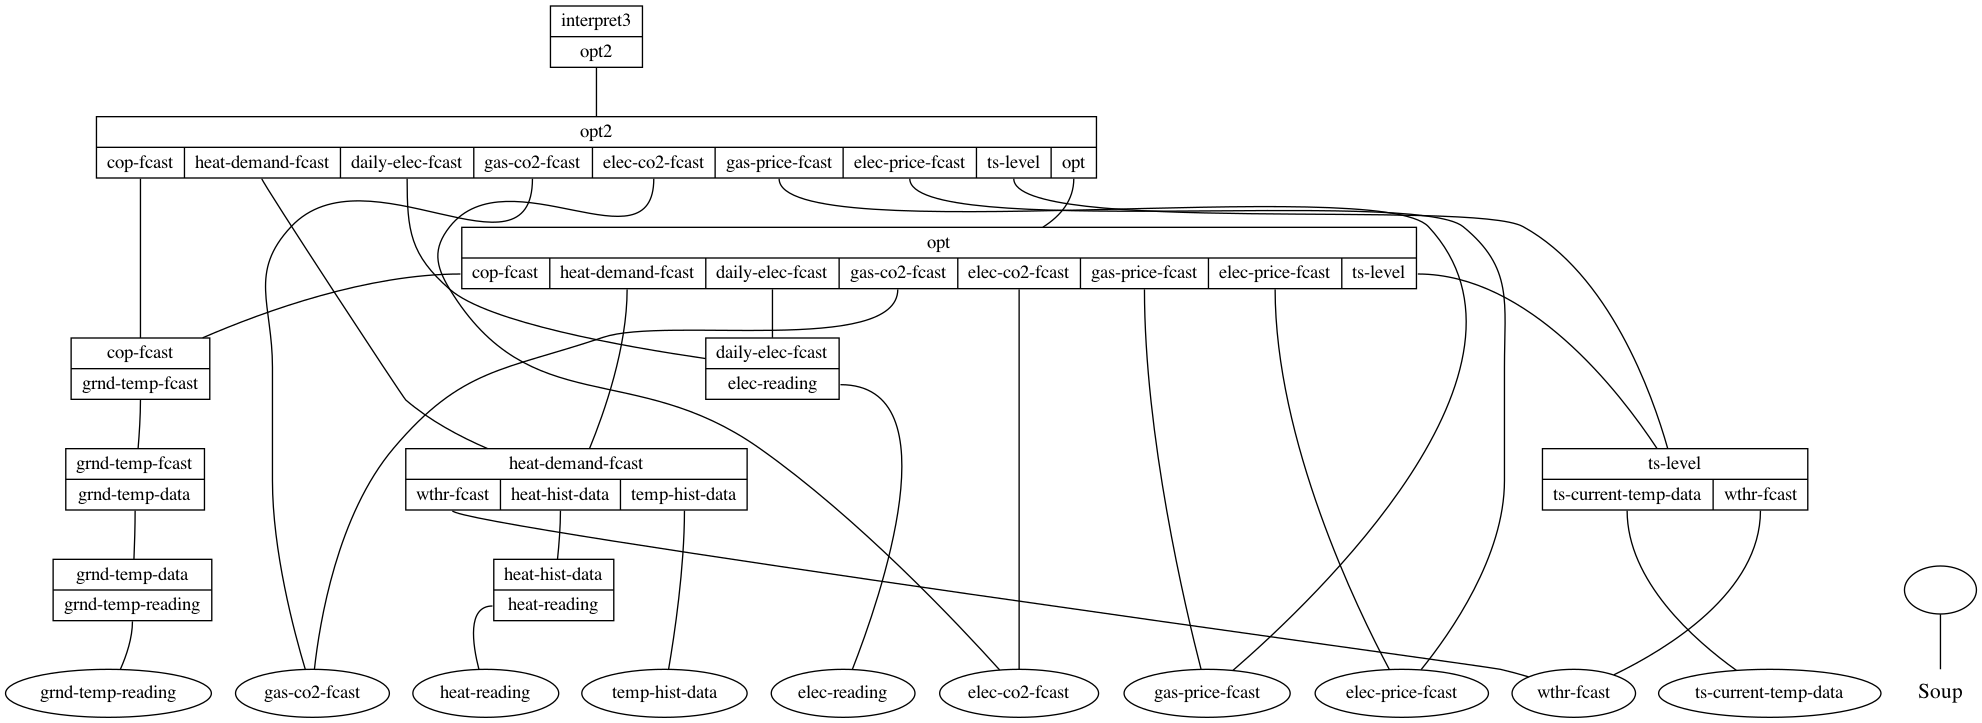

In [4]:
to_graph(hn, fname="/tmp/hn", view=False)
Image(filename='/tmp/hn.png', width=1500, height=1500)

In [5]:
%%javascript
require.config({ 
     paths: { 
     d3: 'https://d3js.org/d3.v5.min'
}});

<IPython.core.display.Javascript object>

In [6]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {   
        var data = [1, 2, 4, 8, 16, 8, 4, 2, 1]

        var svg = d3.select(element.get(0)).append('svg')
            .attr('width', 400)
            .attr('height', 200);
        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr("cx", function(d, i) {return 40 * (i + 1);})
            .attr("cy", function(d, i) {return 100 + 30 * (i % 3 - 1);})
            .style("fill", "#1570a4")
            .transition().duration(2000)
            .attr("r", function(d) {return 2*d;})
        ;
    })
})(element);

<IPython.core.display.Javascript object>